## Part 1 - Exploratory Data Analysis

Using the timestamps from the logins.json file provided, we want to aggregate the number of login users in 15 minute time intervals. We then want to descibe any observable patterns in user logins.

In [1]:
# load python packages
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'/Users/shannonballard/Springboard/Springboard_DSCT_26_2_2_Ultimate Tech Take Home Challenge'

In [3]:
path="/Users/shannonballard/Springboard/Springboard_DSCT_26_2_2_Ultimate Tech Take Home Challenge"
os.chdir(path) 

In [4]:
# load the data and print the first five rows
logins = pd.read_json('logins.json')
logins.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# Are there missing values? Sum all missing values for each column
logins.isnull().sum()

login_time    0
dtype: int64

There are no missing values.

In [6]:
# Put login times in ascending order (just for organizational purposes)
logins.sort_values(by=['login_time'], inplace=True, ascending=True)
logins.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


#### Resample
We want to resample the time series so that it is in 15 minute intervals. To do this, we need to have a "datetime-like index" (see [resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html))

We also need to create a column for the aggregated time intervals to be summed in.

In [7]:
# Make the login_time the index column
logins.set_index('login_time', inplace = True)

In [8]:
# Create 'login_counts' column and fill with 1 (each individual login would be a count of 1)
logins['login_counts'] = 1

In [9]:
# group the login times into 15 minute intervals and sum them
logins_15min = logins.resample('15T').sum()
logins_15min.head()

,login_counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


#### Are there any observable patterns with the login times and counts?

To better understand when users login throughout the given timeframe, we can visualize the counts for each 15 minute time interval. This will help determine if there are any patterns such as cycles, peak times, etc.

In [10]:
# Reset index for graphing data
logins_15minb = logins_15min.reset_index()
logins_15minb.head()

,login_time,login_counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


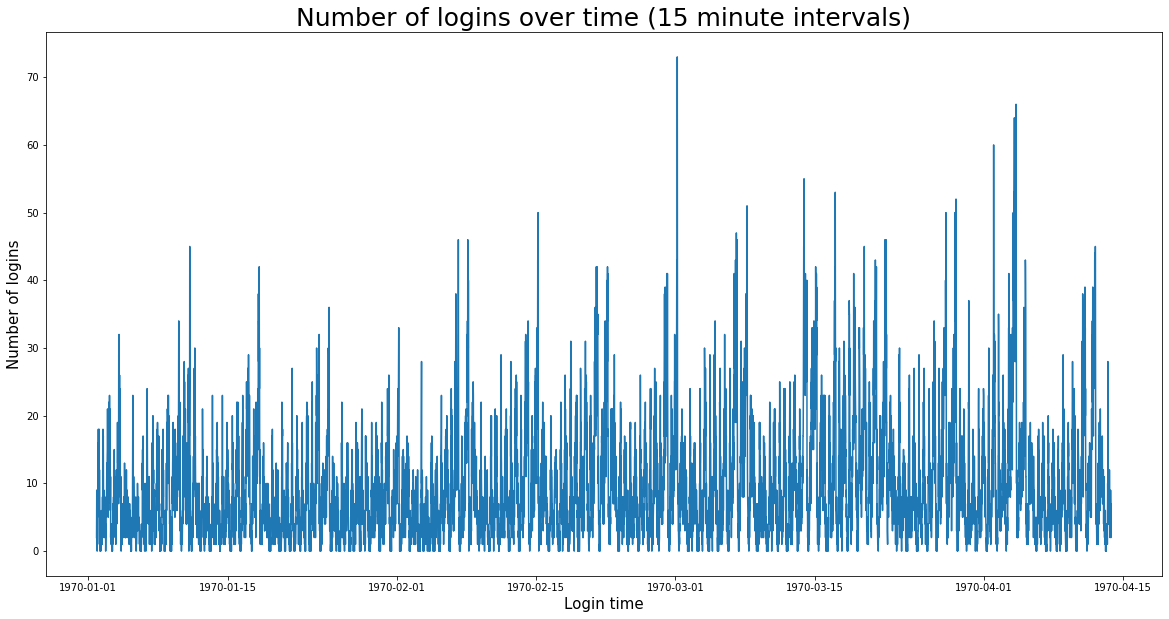

In [11]:
# Are there patterns within a day or between days to when the users login?
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(logins_15minb['login_time'], logins_15minb['login_counts'])
plt.title('Number of logins over time (15 minute intervals)', fontsize = 25)
plt.xlabel('Login time', fontsize = 15)
plt.ylabel('Number of logins', fontsize = 15)
plt.show()

It appears as if there is a seasonality or cyclic trend with the user logins; however, the data is tightly packed together. We can visualize a subset of the data to spread the visualization out more.

In [12]:
# How many 15 minute intervals are there in the dataset?
logins_15minb_length = len(logins_15minb)
print('The number of 15 minute intervals is ', logins_15minb_length)

The number of 15 minute intervals is  9788


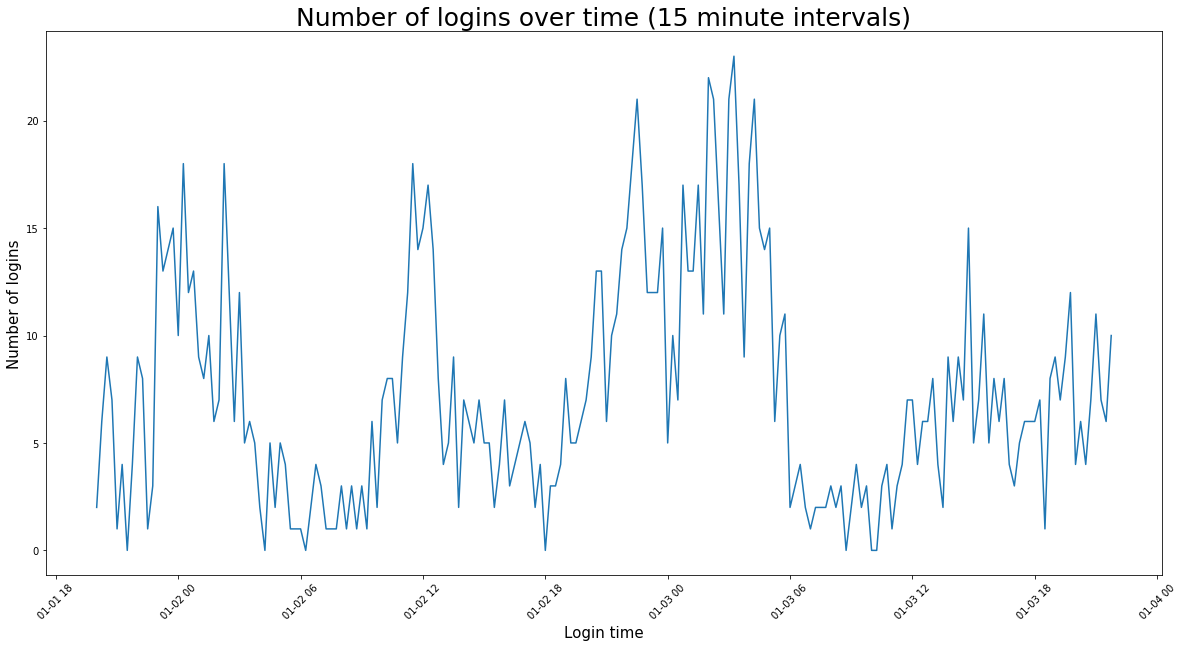

In [13]:
# Let's visualize the first 200 15 minute time intervals

logins_15minb_200 = logins_15minb[0:200]

plt.figure(figsize=(20,10))
plt.plot(logins_15minb_200['login_time'], logins_15minb_200['login_counts'])
plt.title('Number of logins over time (15 minute intervals)', fontsize = 25)
plt.xlabel('Login time', fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel('Number of logins', fontsize = 15)
plt.show()

There appears to be a seasonality in the user login times, where the number of user logins consistently changes during the following time frames:\
6:00pm to 12:00 midnight -- increase in user logins\
12:00 midnight to 6:00am -- decrease in user logins \
6:00am to 12:00 noon -- increase in user logins\
12:00 noon and 6:00pm -- decrease in user logins 

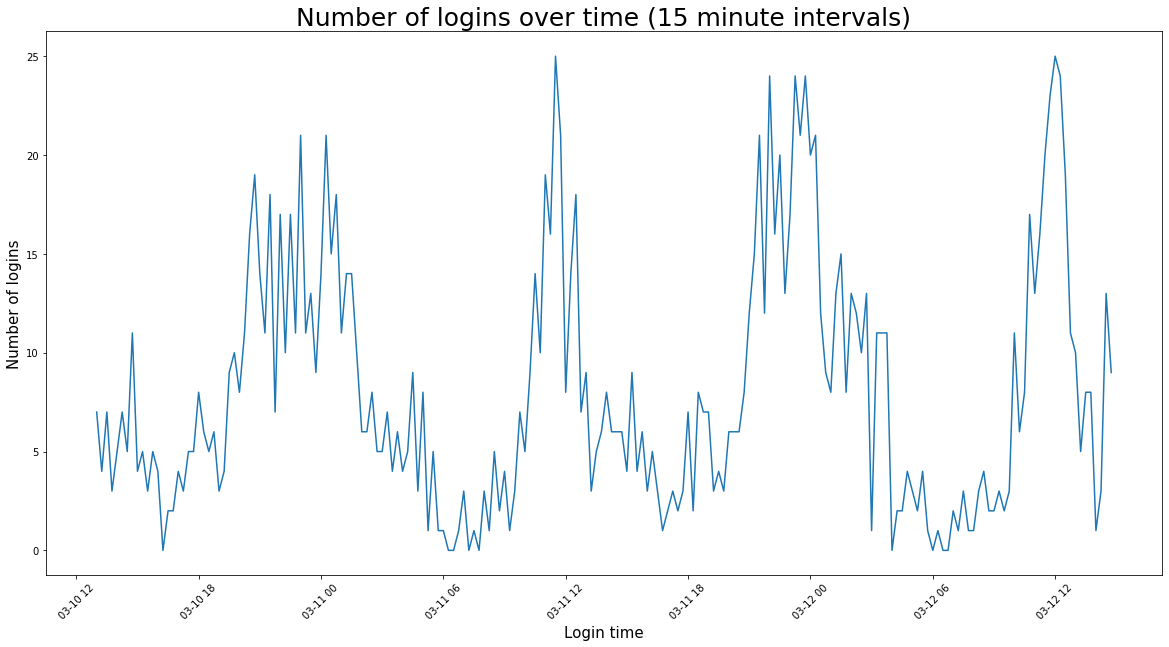

In [14]:
# Lets test another 200 consecutive 15 minute time intervals to see if cycle is the same
logins_15minb_200b = logins_15minb[6500:6700]

plt.figure(figsize=(20,10))
plt.plot(logins_15minb_200b['login_time'], logins_15minb_200b['login_counts'])
plt.title('Number of logins over time (15 minute intervals)', fontsize = 25)
plt.xlabel('Login time', fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel('Number of logins', fontsize = 15)
plt.show()

Do we see the same seasonality of:\
6:00pm to 12:00 midnight -- increase in user logins\
12:00 midnight to 6:00am -- decrease in user logins\
6:00am to 12:00 noon -- increase in user logins\
12:00 noon and 6:00pm -- decrease in user logins 

#### Yes, the seasonality is the same!

In [15]:
# Resample the data into days
logins_hour = logins.resample('H').sum()
logins_hour.head()

,login_counts
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [16]:
# Reset index for graphing data
logins_hourb = logins_hour.reset_index()
logins_hourb.head()

,login_time,login_counts
0,1970-01-01 20:00:00,24
1,1970-01-01 21:00:00,9
2,1970-01-01 22:00:00,21
3,1970-01-01 23:00:00,58
4,1970-01-02 00:00:00,53


In [17]:
logins_hourb['Hour'] = pd.to_datetime(logins_hourb['login_time']).dt.hour
logins_hourb.head()

,login_time,login_counts,Hour
0,1970-01-01 20:00:00,24,20
1,1970-01-01 21:00:00,9,21
2,1970-01-01 22:00:00,21,22
3,1970-01-01 23:00:00,58,23
4,1970-01-02 00:00:00,53,0


In [18]:
logins_by_hour = logins_hourb.groupby(['Hour'])['login_counts'].sum()
logins_by_hour = logins_by_hour.to_frame()
logins_by_hour = logins_by_hour.reset_index()
logins_by_hour.head()

,Hour,login_counts
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


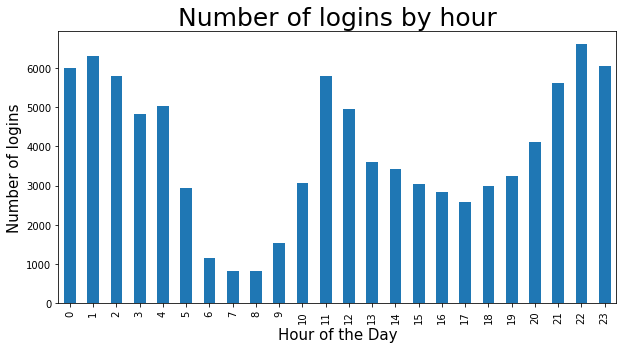

In [19]:
# Plot the number of user logins for each hour of the day
logins_by_hour.plot.bar(x = 'Hour', y = 'login_counts', figsize=(10, 5), legend=None);
plt.title('Number of logins by hour', fontsize = 25)
plt.xlabel('Hour of the Day', fontsize = 15)
plt.ylabel('Number of logins', fontsize = 15)

plt.show()

Again, we can observe the seasonality of the number of logins throughout the day, with a peak in the late hours of the night as well as mid-day. The highest number of the logins occur around 11:00pm (22:00), and the fewest number of logins is at 7:00am and 8:00am.

We have seen seasonality in the time of day in which users log in, but is there also a pattern in the day of the week?

In [20]:
# Resample the data into days
logins_day = logins.resample('D').sum()
logins_day.head()

,login_counts
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [21]:
# Reset index for graphing data
logins_dayb = logins_day.reset_index()
logins_dayb.head()

,login_time,login_counts
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459


In [22]:
logins_dayb['day_of_week'] = logins_dayb['login_time'].dt.day_name()
logins_dayb.head()

,login_time,login_counts,day_of_week
0,1970-01-01,112,Thursday
1,1970-01-02,681,Friday
2,1970-01-03,793,Saturday
3,1970-01-04,788,Sunday
4,1970-01-05,459,Monday


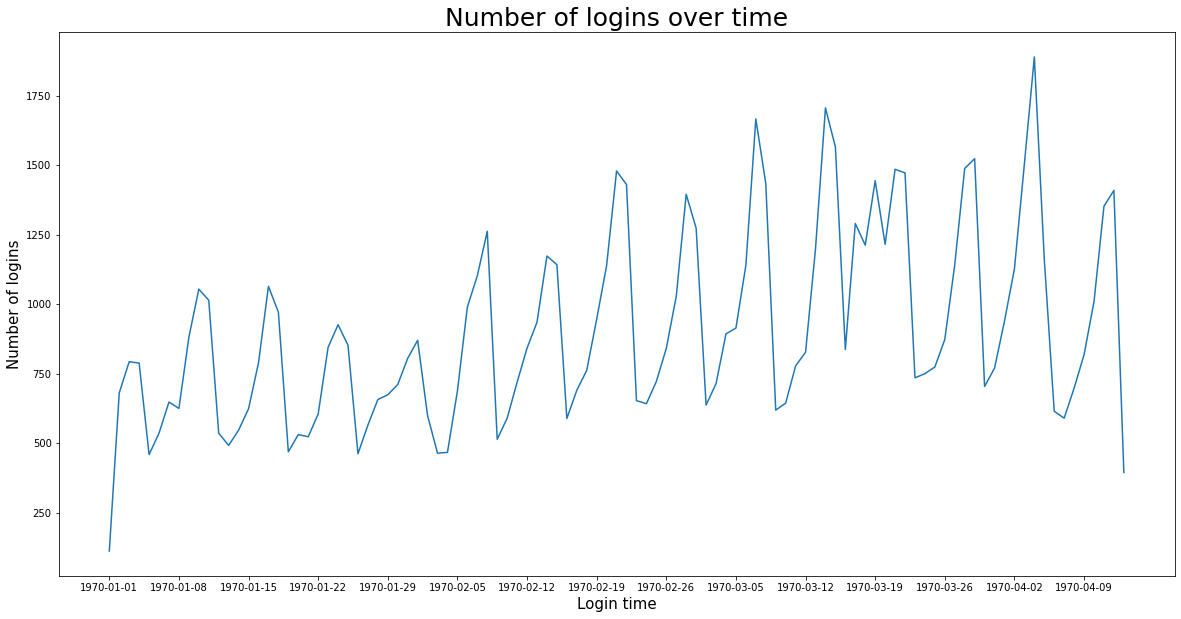

In [23]:
# Graph the dataset to see if there are any trends between days
plt.figure(figsize=(20,10))
plt.plot(logins_dayb['login_time'], logins_dayb['login_counts'])
plt.title('Number of logins over time', fontsize = 25)
plt.xlabel('Login time', fontsize = 15)
plt.xticks(np.arange(0, len(logins_dayb['login_time'])+1, 7))
plt.ylabel('Number of logins', fontsize = 15)
plt.show()

In addition to the seasonality observed throughout the hours of the day, it also appears to have seasonality during the week.

Let's graph a subset of the daily logins.

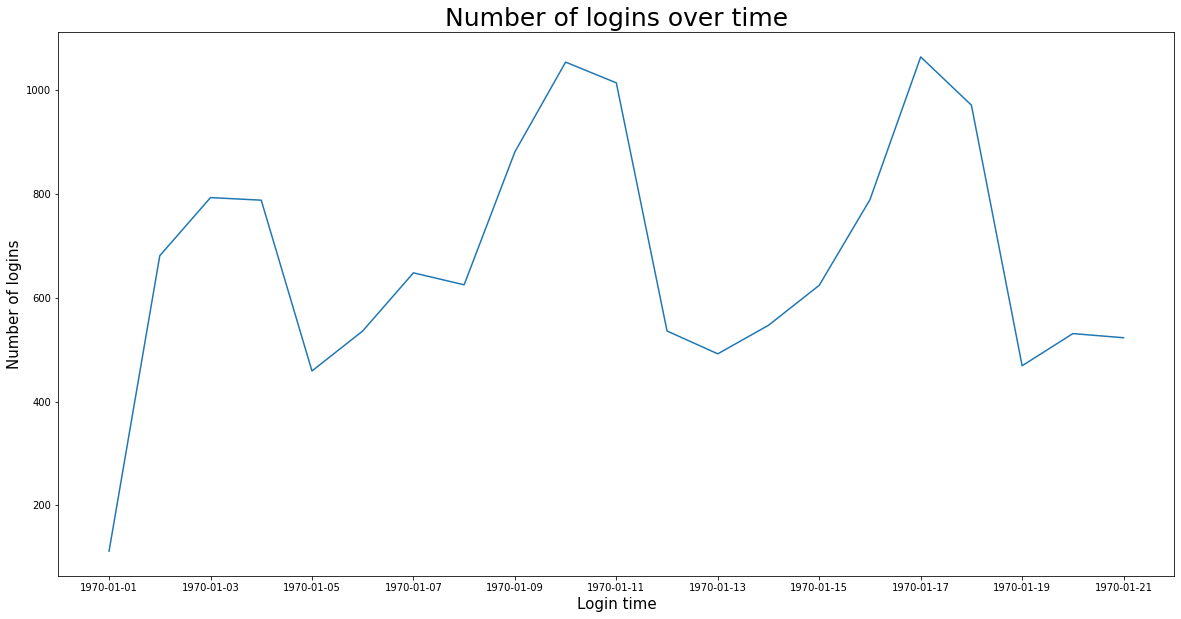

In [24]:
# Graph a subset of the dataset to see if there are any trends between days

logins_dayb_3weeks = logins_dayb[0:21]

plt.figure(figsize=(20,10))
plt.plot(logins_dayb_3weeks['login_time'], logins_dayb_3weeks['login_counts'])
plt.title('Number of logins over time', fontsize = 25)
plt.xlabel('Login time', fontsize = 15)
plt.xticks(np.arange(0, len(logins_dayb_3weeks['login_time'])+1, 2))
plt.ylabel('Number of logins', fontsize = 15)
plt.show()

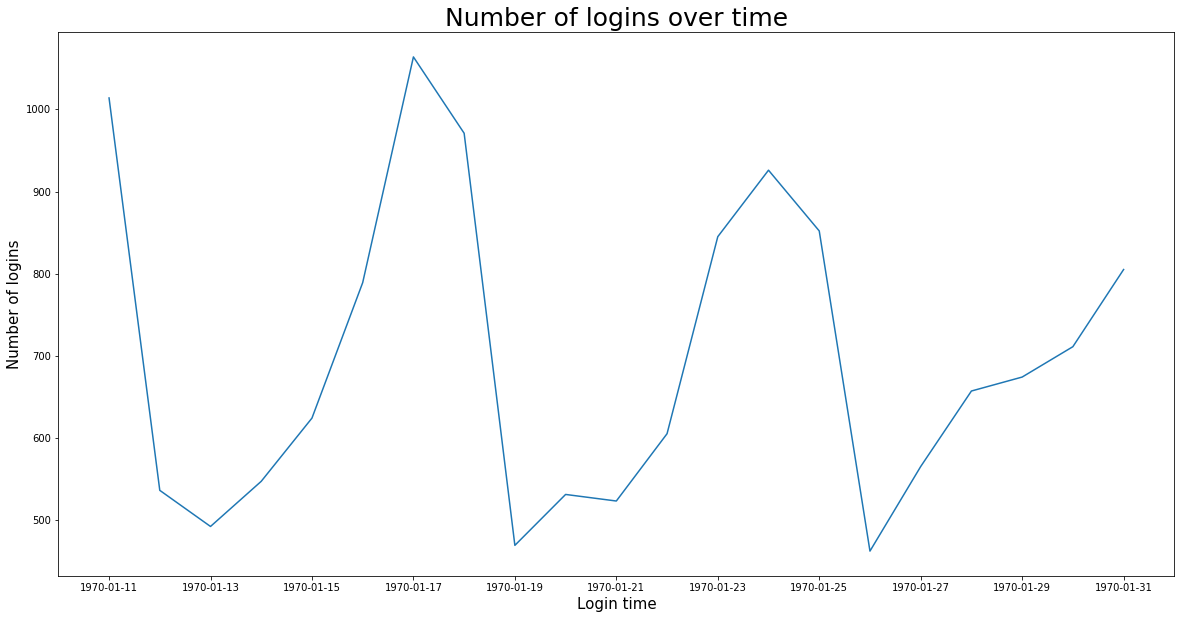

In [25]:
# Graph a different subset of the dataset to see if there are any trends between days

logins_dayb_3weeks = logins_dayb[10:31]

plt.figure(figsize=(20,10))
plt.plot(logins_dayb_3weeks['login_time'], logins_dayb_3weeks['login_counts'])
plt.title('Number of logins over time', fontsize = 25)
plt.xlabel('Login time', fontsize = 15)
plt.xticks(np.arange(10, len(logins_dayb_3weeks['login_time'])+10, 2))
plt.ylabel('Number of logins', fontsize = 15)
plt.show()

The seasonality peaks during the same days of the week.

Let's see which day of the week displays the most user logins

In [26]:
logins_days_of_week = logins_dayb.groupby(['day_of_week'])['login_counts'].sum()
logins_days_of_week= logins_days_of_week.to_frame()
logins_days_of_week= logins_days_of_week.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
logins_days_of_week = logins_days_of_week.reset_index()

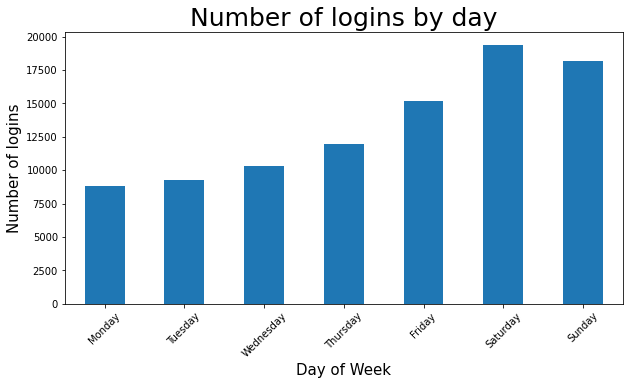

In [27]:
# Plot the number of user logins for each day of the week
logins_days_of_week.plot.bar(x = 'day_of_week', y = 'login_counts', figsize=(10, 5), legend=None);
plt.title('Number of logins by day', fontsize = 25)
plt.xlabel('Day of Week', fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel('Number of logins', fontsize = 15)

plt.show()

From the graph above, we see that the day of the week that has the most user logins is Saturday, followed by Sunday and then Friday. Mondays display the fewest number of logins.

## Summary -

From the exploratory data analyses of the logins.json dataset, we can note a few observations:
* There is an hourly seasonality in the number of user logins, where there are consistent peaks and troughs at particular times of the day:

6:00pm to 12:00 midnight -- increase in user logins\
12:00 midnight to 6:00am -- decrease in user logins\
6:00am to 12:00 noon -- increase in user logins\
12:00 noon and 6:00pm -- decrease in user logins

* The highest number of logins occurs around 11:00pm at night

* There is a daily seasonality in the number of user logins, where there are consistent peaks and troughs on particular days of the week:

day 1 - day4 -- increase in user logins\
day 4 - day7 -- decrease in user logins

With a peak occurring at day 4 of the 7 day week.

* The day with the highest user logins is Saturday, which suggests that day 4 is most likely Saturdays.

Thus, there are hourly and daily patterns for user demand.